In [1]:
cd ..

/home/is/akiyoshi-n/my-project


In [2]:
import pandas as pd
import numpy as np
from pathlib import Path
import time
from datetime import datetime
import torch
import torch.nn as nn
from torch import cuda
from torch.utils.data import DataLoader
from src.my_project.dataset import load_multiclass_dataset, load_dataset_4class_Multi_classification, load_text_dataset, preprocess_text_dataset
from src.my_project.train import MultiClassActClassifier, ModelPredictor
from src.my_project.utils import count_unique_elements
from transformers import BertTokenizer, BertJapaneseTokenizer, BertForSequenceClassification
from transformers import AutoTokenizer, AutoModelForMaskedLM
import pickle
from transformers import AutoModel, AutoTokenizer
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import japanize_matplotlib

In [3]:
DATASET_PATH = Path('/home/is/akiyoshi-n/my-project/data')
output_dir = Path('/home/is/akiyoshi-n/my-project/outputs2')
# パラメータの設定
MAX_LEN = 128
# DROP_RATE = 0.4
BATCH_SIZE = 16
NUM_EPOCHS = 100
LEARNING_RATE = 2e-5
num_folds = 5
PATIENCE = 5
SEED = 2023

# デバイスの指定
device = "cuda:1" if cuda.is_available() else "cpu"

timestamp = datetime.now().strftime("%Y-%m-%dT%H:%M:%S")

In [4]:
# データの読み込み
data, class_name = load_dataset_4class_Multi_classification(f"{DATASET_PATH}/act_classification_final.xlsx")

/home/is/akiyoshi-n/my-project/.venv/lib/python3.11/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


In [8]:
# 東北大BERT-v3
MODEL_NAME = 'cl-tohoku/bert-base-japanese-v3'
tokenizer = BertJapaneseTokenizer.from_pretrained(MODEL_NAME)
trainer = MultiClassActClassifier(tokenizer=tokenizer, model_name = MODEL_NAME, device=device, seed=SEED)
model = trainer.train_full_dataset(model_name=MODEL_NAME, data=data, NUM_EPOCHS=NUM_EPOCHS, device=device, LEARNING_RATE=LEARNING_RATE, BATCH_SIZE=BATCH_SIZE, output_dir=output_dir, MAX_LEN=MAX_LEN, timestamp=timestamp, num_labels=4)

----------------- Full Training -----------------


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at cl-tohoku/bert-base-japanese-v3 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Early stopping. No improvement in loss.
Training complete. Model saved to /home/is/akiyoshi-n/my-project/outputs2/cl-tohoku/bert-base-japanese-v32023-10-17T21:30:33


In [5]:
# 東北大BERT-v3
MODEL_NAME = 'cl-tohoku/bert-base-japanese-v3'
tokenizer = BertJapaneseTokenizer.from_pretrained(MODEL_NAME)

# 交差検証の実行
trainer = MultiClassActClassifier(tokenizer=tokenizer, model_name = MODEL_NAME, device=device, seed=SEED)
fold_scores, fold_f1, fold_hamming, best_model, all_predictions, all_labels = trainer.cross_validation(MODEL_NAME, data, num_folds, NUM_EPOCHS,
                                                            device, LEARNING_RATE,
                                                            BATCH_SIZE, output_dir, MAX_LEN, timestamp, num_labels=4)


-----------------Fold: 1-----------------


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at cl-tohoku/bert-base-japanese-v3 and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Early stopping. No improvement in loss.
Accuracy: 0.6227272727272727
macro f1: 0.5764003374414453
humming: 0.1693181818181818
-----------------Fold: 2-----------------


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at cl-tohoku/bert-base-japanese-v3 and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Early stopping. No improvement in loss.
Accuracy: 0.5727272727272728
macro f1: 0.5575657617845118
humming: 0.19545454545454546
-----------------Fold: 3-----------------


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at cl-tohoku/bert-base-japanese-v3 and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Early stopping. No improvement in loss.
Accuracy: 0.6363636363636364
macro f1: 0.5634573799713626
humming: 0.17272727272727273
-----------------Fold: 4-----------------


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at cl-tohoku/bert-base-japanese-v3 and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Early stopping. No improvement in loss.
Accuracy: 0.5636363636363636
macro f1: 0.5897615699086287
humming: 0.1715909090909091
-----------------Fold: 5-----------------


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at cl-tohoku/bert-base-japanese-v3 and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Early stopping. No improvement in loss.
Accuracy: 0.5636363636363636
macro f1: 0.5754264972776769
humming: 0.18977272727272726
-------------------------------------
finished epochs : [54, 13, 21, 62, 19]
Average Accuracy: 0.5918181818181817
Average macro f1: 0.5725223092767251
Average humming: 0.17977272727272728


In [7]:
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix

# 混合行列を計算
cm = multilabel_confusion_matrix(all_labels, all_predictions)

# 混合行列を表示
for i, matrix in enumerate(cm):
    print(f"Label {class_name[i]}:")
    print(matrix)
    print("-" * 20)

Label 1:
[[961  44]
 [ 41  54]]
--------------------
Label 2:
[[985  20]
 [ 54  41]]
--------------------
Label 3:
[[650 114]
 [189 147]]
--------------------
Label 4.:
[[325 175]
 [154 446]]
--------------------


In [5]:
# 東北大BERT-v2
MODEL_NAME = 'cl-tohoku/bert-base-japanese-v2'
tokenizer = BertJapaneseTokenizer.from_pretrained(MODEL_NAME)

# 交差検証の実行
trainer = MultiClassActClassifier(tokenizer=tokenizer, model_name = MODEL_NAME, device=device, seed=SEED)
fold_scores, fold_f1, fold_hamming, best_model, all_predictions, all_labels = trainer.cross_validation(MODEL_NAME, data, num_folds, NUM_EPOCHS,
                                                            device, LEARNING_RATE,
                                                            BATCH_SIZE, output_dir, MAX_LEN, timestamp, num_labels=4)


-----------------Fold: 1-----------------


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at cl-tohoku/bert-base-japanese-v2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Early stopping. No improvement in loss.
Accuracy: 0.6181818181818182
macro f1: 0.5670589875620814
humming: 0.1715909090909091
-----------------Fold: 2-----------------


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at cl-tohoku/bert-base-japanese-v2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Early stopping. No improvement in loss.
Accuracy: 0.55
macro f1: 0.5925450964266635
humming: 0.19772727272727272
-----------------Fold: 3-----------------


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at cl-tohoku/bert-base-japanese-v2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Early stopping. No improvement in loss.
Accuracy: 0.6590909090909091
macro f1: 0.5907058080808081
humming: 0.16022727272727272
-----------------Fold: 4-----------------


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at cl-tohoku/bert-base-japanese-v2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Early stopping. No improvement in loss.
Accuracy: 0.6136363636363636
macro f1: 0.4861993125638983
humming: 0.18636363636363637
-----------------Fold: 5-----------------


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at cl-tohoku/bert-base-japanese-v2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Early stopping. No improvement in loss.
Accuracy: 0.5045454545454545
macro f1: 0.5364028143379638
humming: 0.20681818181818182
-------------------------------------
finished epochs : [14, 16, 24, 23, 21]
Average Accuracy: 0.5890909090909091
Average macro f1: 0.554582403794283
Average humming: 0.18454545454545454


In [6]:
# bert-base-uncased
MODEL_NAME = 'bert-base-uncased'
tokenizer = BertJapaneseTokenizer.from_pretrained(MODEL_NAME)

# 交差検証の実行
trainer = MultiClassActClassifier(tokenizer=tokenizer, model_name = MODEL_NAME, device=device, seed=SEED)
fold_scores, fold_f1, fold_hamming, best_model, all_predictions, all_labels = trainer.cross_validation(MODEL_NAME, data, num_folds, NUM_EPOCHS,
                                                            device, LEARNING_RATE,
                                                            BATCH_SIZE, output_dir, MAX_LEN, timestamp, num_labels=4)

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'BertTokenizer'. 
The class this function is called from is 'BertJapaneseTokenizer'.


-----------------Fold: 1-----------------


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Early stopping. No improvement in loss.
Accuracy: 0.4863636363636364
macro f1: 0.3683207822861639
humming: 0.22386363636363638
-----------------Fold: 2-----------------


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Early stopping. No improvement in loss.
Accuracy: 0.4772727272727273
macro f1: 0.3806278585240205
humming: 0.2159090909090909
-----------------Fold: 3-----------------


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Early stopping. No improvement in loss.
Accuracy: 0.44545454545454544
macro f1: 0.3461497211497211
humming: 0.22727272727272727
-----------------Fold: 4-----------------


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Early stopping. No improvement in loss.
Accuracy: 0.4727272727272727
macro f1: 0.3504333204004733
humming: 0.22272727272727272
-----------------Fold: 5-----------------


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Early stopping. No improvement in loss.
Accuracy: 0.4681818181818182
macro f1: 0.30699062164186397
humming: 0.22954545454545455
-------------------------------------
finished epochs : [28, 29, 23, 30, 27]
Average Accuracy: 0.47000000000000003
Average macro f1: 0.35050446080044856
Average humming: 0.22386363636363638


In [4]:
# データの読み込み
df = pd.read_csv(f"{DATASET_PATH}/rever_top10_users.csv")
print(df.shape)
df.loc[580842:580852, :]

(581014, 4)


,tweet_id,user_id,text,time
580842,10981153445,momokama,空白充けまい,2010-03-24 23:20:17
580843,10981447850,momokama,鎌田です,2010-03-24 23:26:47
580844,10981484342,momokama,NaN,2010-03-24 23:27:36
580845,10981509169,momokama,NaN,2010-03-24 23:28:11
580846,10981513246,momokama,NaN,2010-03-24 23:28:16
580847,10981518175,momokama,NaN,2010-03-24 23:28:22
580848,10981548713,momokama,NaN,2010-03-24 23:29:02
580849,10981552399,momokama,NaN,2010-03-24 23:29:08
580850,10981555839,momokama,NaN,2010-03-24 23:29:12
580851,10981621153,momokama,[USR],2010-03-24 23:30:35


In [5]:
# textが欠損値の行を削除
df = df.dropna(subset=['text'])
print(df.shape)
df.loc[580842:580852, :]

(581007, 4)


,tweet_id,user_id,text,time
580842,10981153445,momokama,空白充けまい,2010-03-24 23:20:17
580843,10981447850,momokama,鎌田です,2010-03-24 23:26:47
580851,10981621153,momokama,[USR],2010-03-24 23:30:35
580852,10981883314,momokama,[USR] だだー,2010-03-24 23:36:16


In [6]:
# データの読み込み
# 欠損値を除いたdfからテキストデータを抽出
data = load_text_dataset(df=df)
# data = load_text_dataset(f"{DATASET_PATH}/rever_top10_users.csv")
print(len(data['texts']))

581007


In [12]:
# 保存したモデルのディレクトリパス
model_path = f"{output_dir}/cl-tohoku/bert-base-japanese-v32023-10-17T21:30:33"

# モデルを読み込む
model = BertForSequenceClassification.from_pretrained(model_path)

MODEL_NAME = 'cl-tohoku/bert-base-japanese-v3'
tokenizer = BertJapaneseTokenizer.from_pretrained(MODEL_NAME)

In [14]:
# ModelPredictorクラスのインスタンスを作成
predictor = ModelPredictor(model, device)

In [15]:
# dataから行動ラベルを予測
predictions = predictor.predict(data, tokenizer, MAX_LEN, BATCH_SIZE)

In [18]:
type(predictions)

list

In [19]:
timestamp

'2023-10-18T17:40:08'

In [20]:
# pickleでpredictionsを保存
# with open(f"{output_dir}/4_class_predictions{timestamp}.pkl", "wb") as f:
#     pickle.dump(predictions, f)

In [9]:
# pickleで保存したデータを読み込む
with open(f"{output_dir}/4_class_predictions2023-10-18T17:40:08.pkl", "rb") as f:
    predictions = pickle.load(f)

In [10]:
len(predictions)

581007

In [11]:
predictions[0]

array([0., 0., 1., 0.], dtype=float32)

In [12]:
# predictionsに含まれている配列の要素をint型に変換
predictions = [list(map(int, prediction)) for prediction in predictions]

In [13]:
predictions[0]

[0, 0, 1, 0]

In [14]:
# predictionsに対してdfのindexを付与
df['predictions'] = predictions
df.loc[580842:580852, :]

,tweet_id,user_id,text,time,predictions
580842,10981153445,momokama,空白充けまい,2010-03-24 23:20:17,"[0, 0, 0, 1]"
580843,10981447850,momokama,鎌田です,2010-03-24 23:26:47,"[0, 1, 0, 0]"
580851,10981621153,momokama,[USR],2010-03-24 23:30:35,"[0, 0, 0, 1]"
580852,10981883314,momokama,[USR] だだー,2010-03-24 23:36:16,"[0, 0, 0, 1]"


In [44]:
# pickleでdfを保存
# with open(f"{output_dir}/4_class_predictions_dataframe{timestamp}.pkl", "wb") as f:
#     pickle.dump(df, f)

In [4]:
# pickleで保存した予測ラベル付きdfを読み込む
with open(f"{output_dir}/4_class_predictions_dataframe2023-10-18T17:40:08.pkl", "rb") as f:
    df = pickle.load(f)

In [5]:
df.head(5)

,tweet_id,user_id,text,time,predictions
0,5376319513,azusa_soleil,[あおうさ＠日記(id:bluerabbit)][技術] #appengine のDatav...,2009-11-03 08:30:27,"[0, 0, 1, 0]"
1,5376319747,azusa_soleil,[あおうさ＠日記(id:bluerabbit)][技術] #appengine で一回に削除...,2009-11-03 08:30:27,"[0, 0, 0, 1]"
2,5376567248,azusa_soleil,[asahi.com]容疑者逃走護送車、後部座席は署員１人 「太っていて」 [URL],2009-11-03 08:40:33,"[0, 0, 1, 0]"
3,5376567291,azusa_soleil,[CNN.com]Iran urged to respond to uranium plan...,2009-11-03 08:40:34,"[0, 0, 0, 1]"
4,5376567549,azusa_soleil,[CNN.com]Peace Corps to return to Sierra Leone...,2009-11-03 08:40:34,"[0, 0, 0, 1]"


In [6]:
# time列をdatetime型に変換
df['time'] = pd.to_datetime(df['time'])

In [7]:
df['user_id'].value_counts()

user_id
michio_mukui      100261
fmfm_collector     76923
azusa_soleil       61537
midnight_bot       59875
googlenewsjp       56491
gadget7a           55258
c50cub96           47250
kyubot             42896
mariya_hc          40911
momokama           39605
Name: count, dtype: int64

In [8]:
# michio_mukuiのツイートのみ抽出
df_c50 = df[df['user_id'] == 'c50cub96']
df_c50.shape

(47250, 5)

In [9]:
df_c50.head(5)

,tweet_id,user_id,text,time,predictions
61537,5377216949,c50cub96,３日間「露出」という単語に違和感を感じずには得られないクソ寒い朝です、おはよう,2009-11-03 09:07:22,"[0, 0, 0, 1]"
61538,5377579847,c50cub96,[USR] おはー、今日はソロツーだw,2009-11-03 09:22:29,"[0, 0, 0, 1]"
61539,5377586623,c50cub96,分かりませんねえ、実際被害も出てるのに、おはようございます。 RT [USR] そう！しか...,2009-11-03 09:22:46,"[0, 0, 0, 1]"
61540,5377598334,c50cub96,風呂っていいね。つま先まで暖まる。,2009-11-03 09:23:15,"[1, 0, 0, 0]"
61541,5377738531,c50cub96,朝からpupaである。,2009-11-03 09:29:03,"[1, 0, 0, 0]"


In [10]:
print(type(df_c50.loc[61537,'time']))
print(df_c50.loc[61537,'time'].date())

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2009-11-03


In [16]:
type(df_c50.loc[61537]['time'])

pandas._libs.tslibs.timestamps.Timestamp

In [18]:
count = 0
for data in df_c50:
    print(data)
    count += 1
    if count == 10:
        break

tweet_id
user_id
text
time
predictions


In [ ]:
# df_c50から1行ずつ取り出して、日付と予測ラベルを取得
dates = []
labels = []
for i in range(len(df_c50)):
    date = df_c50.iloc[i]['time'].date()
    label = df_c50.iloc[i]['predictions']
    dates.append(date)
    labels.append(label)

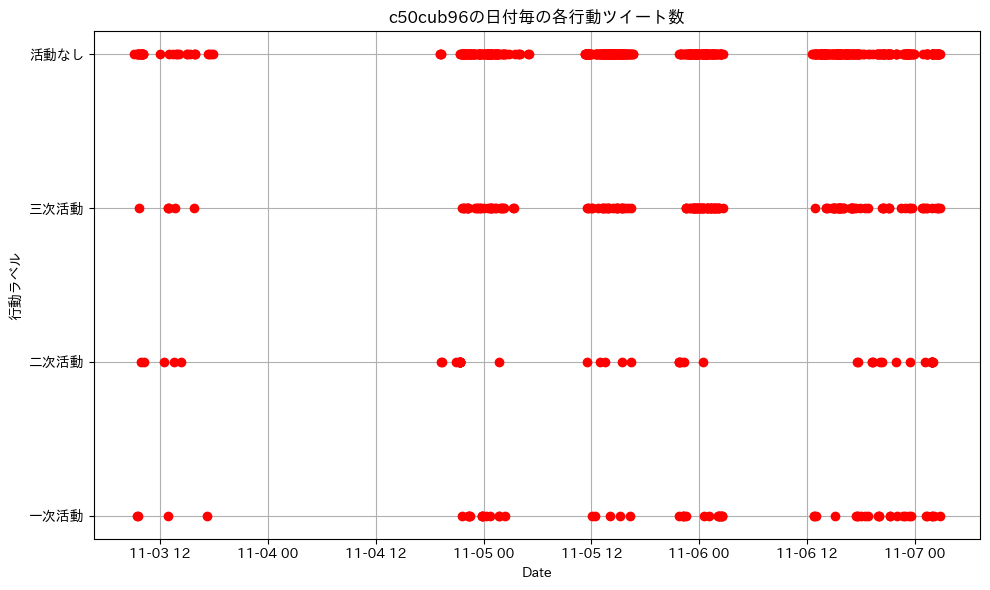

In [31]:
plt.figure(figsize=(10, 6))

# カラム名またはカテゴリ名のリスト
column_names = ["一次活動", "二次活動", "三次活動", "活動なし"]

# カウントを初期化
count = 0

# 各行について処理を行います。
for i, row in df_c50.iterrows():
    date = row['time']
    predictions = row['predictions']
    
    # predictionsリスト内の各値をチェックします。
    for j, value in enumerate(predictions):
        if value == 1:
            # '1'の場合、その位置にプロットを追加します。
            plt.plot(date, j, 'ro')  # 'ro'は赤色のマーカーを意味します。
    count += 1
    if count == 1000:
        break

# グラフのタイトルとラベルを設定します。
plt.title('c50cub96の日付毎の各行動ツイート数')
plt.xlabel('Date')
plt.ylabel('行動ラベル')

# Y軸のティックラベルをカラム名に設定
plt.yticks(range(len(column_names)), column_names)

# Y軸のティックを整数に制限
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

# グリッドラインを表示
plt.grid(True)

# グラフを表示
plt.tight_layout()  # ラベルが重ならないようにレイアウトを自動調整
# グラフを表示します。
plt.show()

In [13]:
# 年，月，日を抽出し，新しい列を作成
df_c50['time_year-month-day'] = df_c50['time'].dt.date

/tmp/ipykernel_347944/2987747275.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c50['time_year-month-day'] = df_c50['time'].dt.date


In [14]:
df_c50.head(2)

,tweet_id,user_id,text,time,predictions,time_year-month-day
61537,5377216949,c50cub96,３日間「露出」という単語に違和感を感じずには得られないクソ寒い朝です、おはよう,2009-11-03 09:07:22,"[0, 0, 0, 1]",2009-11-03
61538,5377579847,c50cub96,[USR] おはー、今日はソロツーだw,2009-11-03 09:22:29,"[0, 0, 0, 1]",2009-11-03


In [52]:
# 年月日毎にグループ化
grouped = df_c50.groupby('time_year-month-day')

In [53]:
def sum_predictions_vertically(df):
    # 各リストの同じ位置の要素を足し合わせる
    summed_list = [sum(x) for x in zip(*df['predictions'])]
    return summed_list

In [54]:
time_label = grouped.apply(sum_predictions_vertically)

In [55]:
type(time_label)

pandas.core.series.Series

In [56]:
time_label

time_year-month-day
2009-11-03        [4, 5, 6, 35]
2009-11-04      [9, 13, 15, 61]
2009-11-05    [15, 11, 60, 259]
2009-11-06    [30, 10, 77, 264]
2009-11-07     [15, 13, 15, 66]
                    ...        
2010-03-21       [8, 6, 32, 89]
2010-03-22       [4, 9, 30, 64]
2010-03-23     [6, 30, 39, 137]
2010-03-24    [10, 14, 42, 170]
2010-03-25      [6, 3, 74, 173]
Length: 143, dtype: object

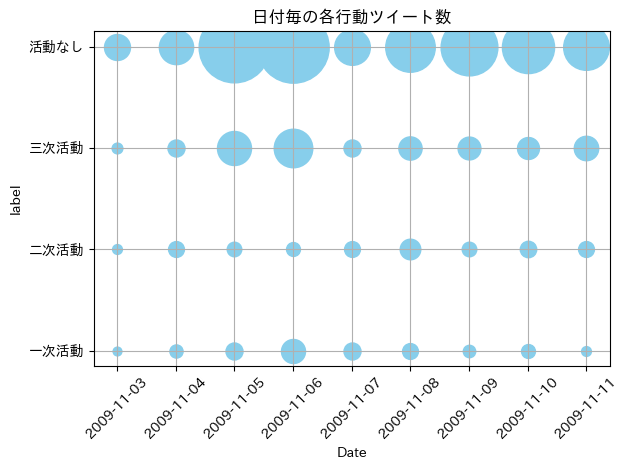

In [57]:
count = 0
dates = [] # 日付を格納するリスト

# カラム名またはカテゴリ名のリスト
column_names = ["一次活動", "二次活動", "三次活動", "活動なし"]

# 各日付に対して複数のポイントをプロット
for date, values in time_label.items():
    count += 1
    if count == 10:
        break
    for i, value in enumerate(values):
        plt.scatter(date, i, s=value*10, marker='o', color='skyblue')  # 各値に対してポイントをプロット
    dates.append(date)  # プロットされた日付をリストに追加

# X軸のティックラベルを傾ける
plt.xticks(dates, rotation=45)  # ここでrotationパラメータを設定

# グラフのタイトルと軸ラベルを設定
plt.title('日付毎の各行動ツイート数')
plt.xlabel('Date')
plt.ylabel('label')

# Y軸のティックラベルをカラム名に設定
plt.yticks(range(len(column_names)), column_names)

# Y軸のティックを整数に制限
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

# グリッドラインを表示
plt.grid(True)

# グラフを表示
plt.tight_layout()  # ラベルが重ならないようにレイアウトを自動調整

ValueError: setting an array element with a sequence.

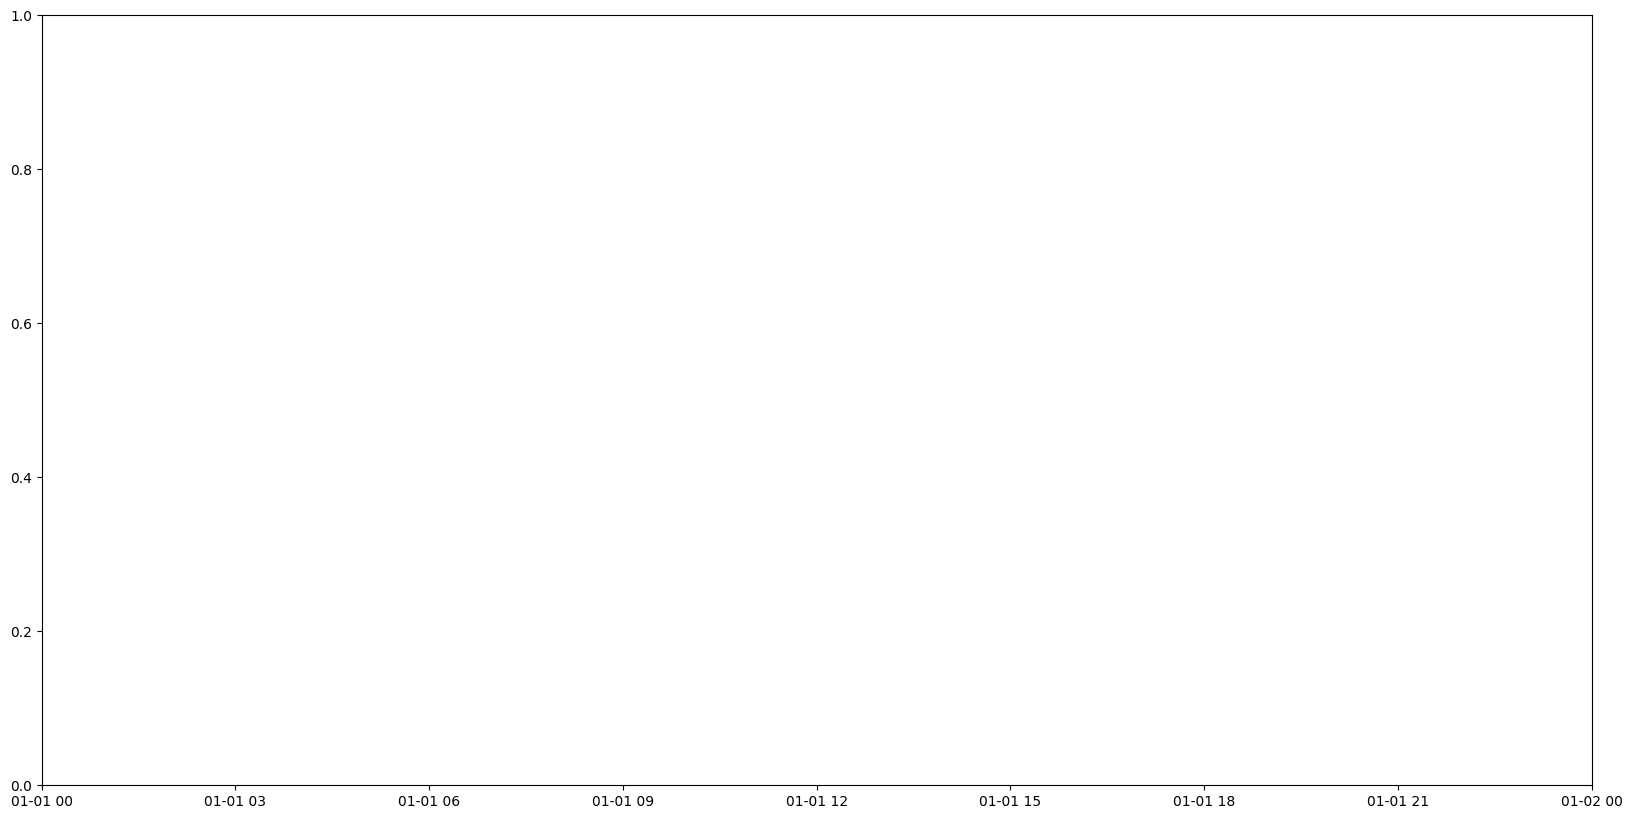

In [34]:
# 横軸を日付，縦軸を予測ラベルの合計値とするグラフを作成
# 予測ラベルの合計値が大きければ大きいほどプロットを大きくする
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

# 日付を横軸に設定
x = grouped['time_year-month-day'].first()
# 予測ラベルの合計値を縦軸に設定
y = grouped.apply(sum_predictions_vertically)

# グラフの作成
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(x, y, marker='o', markersize=20)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax.set_ylim(0, 4)
ax.set_xlabel('date')
ax.set_ylabel('sum of predictions')
ax.set_title('sum of predictions by date')
plt.show()

In [8]:
# 関数内でのデータローダへの変更を確認
MODEL_NAME = 'cl-tohoku/bert-base-japanese-v3'
tokenizer = BertJapaneseTokenizer.from_pretrained(MODEL_NAME)
encoding = preprocess_text_dataset(data, tokenizer, MAX_LEN)
dataloader = DataLoader(encoding, BATCH_SIZE)
for input_ids, attention_mask in dataloader:
    print(len(input_ids))
    print(len(attention_mask))
    break